자동차 연비 예측 분석 ==> 회귀분석

In [1]:
# numpy, pandas 를 import
import numpy as np
import pandas as pd

# auto-mpg.csv 파일을 읽어 data_df에 넣기
data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

In [2]:
# 데이터 셋 크기 확인
data_df.shape

(398, 9)

In [3]:
# data_df 에서 위에서 5개 데이터 확인
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# data_df 에 데이터 유형 확인
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# 'car_name', 'origin', 'horsepower' 제거
data_df = data_df.drop(['car_name', 'origin', 'horsepower'],axis=1,inplace=False)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [7]:
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [9]:
data_df.shape

(398, 6)

In [11]:
# X(mpg 제외한 나머지), Y(mpg)분할
Y=data_df['mpg']
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [12]:
X=data_df.drop(['mpg'],axis=1, inplace=False)
X

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70
...,...,...,...,...,...
393,4,140.0,2790,15.6,82
394,4,97.0,2130,24.6,82
395,4,135.0,2295,11.6,82
396,4,120.0,2625,18.6,82


In [13]:
# 훈련용데이터와 평가용데이터 분할하기 (7:3)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=0)
X_train

,cylinders,displacement,weight,acceleration,model_year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81
140,8,304.0,4257,15.5,74
22,4,104.0,2375,17.5,70
250,8,318.0,3735,13.2,78
...,...,...,...,...,...
323,4,156.0,2800,14.4,80
192,6,250.0,3353,14.5,76
117,4,68.0,1867,19.5,73
47,6,250.0,3282,15.0,71


In [14]:
# 선형회귀분석 : 모델 생성(lr)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 훈련
lr.fit(X_train,Y_train)

LinearRegression()

In [15]:
# 평가 데이터에 대한 예측 수행 (Y_predict)
Y_predict = lr.predict(X_test)
Y_predict

array([12.68813886, 24.89235692, 11.77966226, 20.713484  , 17.59974974,
       28.70463932, 31.8246109 , 24.79459783, 13.3797074 , 28.03809202,
       33.95480562, 32.517138  , 21.28643713, 26.32547953, 16.29305741,
       32.16905355, 30.04731897, 29.90617451, 17.78110613, 30.69577551,
       15.33574367, 25.60299563, 25.4723533 , 20.04730443, 30.70244174,
       26.79576507, 32.20306918, 31.95533215, 30.42830733, 18.19432511,
       21.19981862, 29.62938625, 20.86352443, 30.82503708, 24.35511863,
       23.81034331, 21.45816755, 16.77101118, 31.95362794,  8.06590693,
        9.60178767, 13.8699291 , 27.26165312, 29.00102026, 29.52364892,
       22.58571769, 23.20233694, 13.80533693, 23.86039376, 28.12535283,
       31.40954528, 26.70297991, 15.34381889, 25.01897062, 14.71481708,
        9.53883961, 19.64272577, 26.82491432, 31.30917854, 14.99268593,
       20.64360774, 25.57610711, 22.45200894, 19.72033566, 10.7918702 ,
       11.42513414,  9.7023088 , 19.68724093, 24.98227534,  9.68

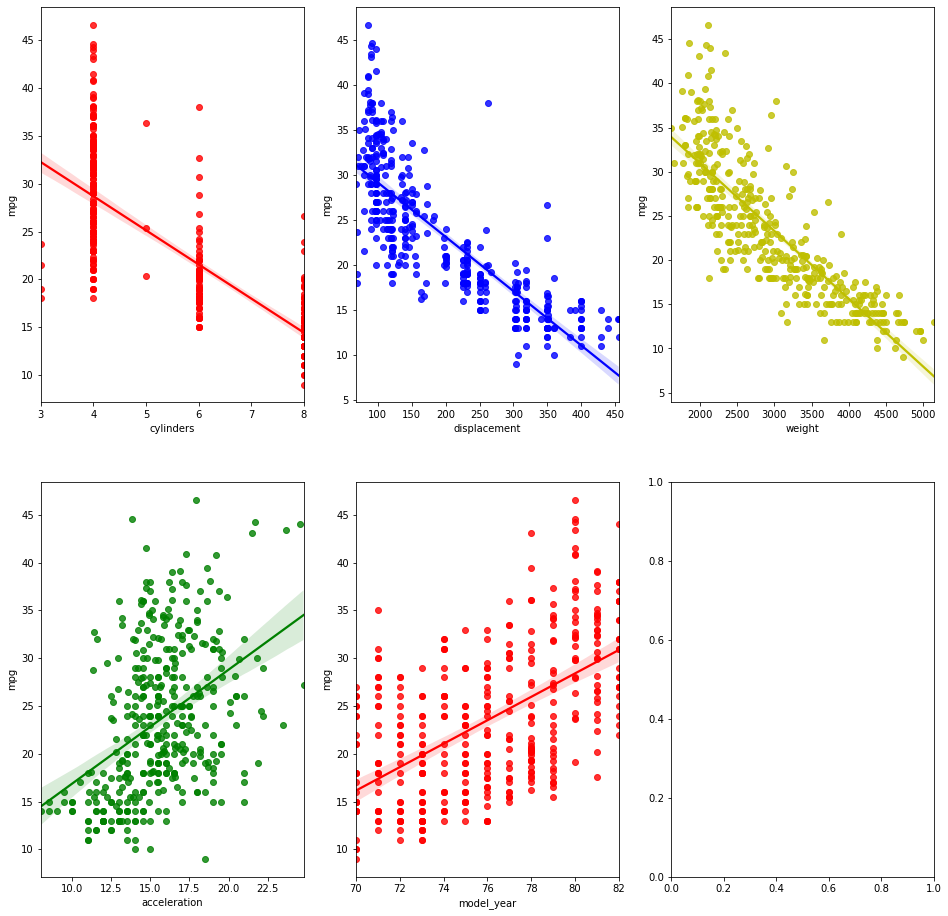

In [18]:
# 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

x_features = ['cylinders','displacement','weight','acceleration','model_year']
plot_color = ['r', 'b', 'y', 'g', 'r']

fig, axs = plt.subplots(figsize=(16,16), ncols=3,nrows=2)
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    # print(row,col)
    # regplot : 산점도와 선형 회귀 그래표 함께 그려줌
    sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

In [20]:
# 실제값과 예측값의 차이를 제곱으로 평균 (MSE)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_predict)
mse

12.27823903660944

In [21]:
rmse = np.sqrt(mse)
rmse

3.5040318258556726

In [22]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

MSE : 12.278, RMSE : 3.504


In [23]:
# 결정계수
r2 = r2_score(Y_test, Y_predict)
r2

0.8078579451877174

In [24]:
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

R^2(Variance score) : 0.808


In [26]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [27]:
coef = pd.Series(data = np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [28]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : ")) # 8
displacement_1 = int(input("displacement : ")) # 350
weight_1 = int(input("weight : ")) # 3200
acceleration_1 = int(input("acceleration : ")) # 22
model_year_1 = int(input("model_year : ")) # 99

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99


In [31]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, 
                           acceleration_1 , model_year_1]])
mpg_predict

array([41.31991868])